# Understanding Interlayer Coupling in Few-Layer $MoS_{2}$  through Stacking Configuration Control
* Stacking dependent bandgap of $MoS_{2}$ on (highly )HOPG substrates 

# <font color=blue>Fig 1- AFM + KPFM data analysis (Fig 1- large scan)</font>

## ($MoS_{2}$ islands on HOPG substrates) STS data analysis data analysis 

> * file loading : **SPMpy_file_loading_funcs**
    > * Loading gwyddion file (*.gwy) loading (after image treatments with Gwyddion)

> * 3D data analysis functions : **SPMpy_3D_data_analysis_funcs**
> * 2D data analysis functions : **SPMpy_2D_data_analysis_funcs**


* Authors : Dr. Jewook Park(ORNL, & IBS )
    * *Center for Nanophase Materials Sciences, Oak Ridge National Laboratory, Oak Ridge, Tennessee 37831, USA *
    * *Center for van der Waals Quantum Solid, Institute for Basic Science (IBS), Pohang 37673, Korea* 
    * *Center for Artificial Low Dimensional Electronic Systems, Institute for Basic Science (IBS), Pohang, Korea* 
    * email :  parkj1@ornl.gov

> **SPMpy** is a python package for scanning probe microscopy (SPM) data analysis, such as scanning tunneling microscopy and spectroscopy (STM/S) data and atomic force microscopy (AFM) images, which are inherently multidimensional. To analyze SPM data, SPMpy exploits recent image processing(a.k.a. Computer Vision) techniques. SPMpy data analysis functions utilize well-established Python packages, such as Numpy, PANDAS, matplotlib, Seaborn, holoview, etc. In addition, many parts are inspired by well-known SPM data analysis programs, for example, Wsxm and Gwyddion. Also, SPMpy is trying to apply lessons from 'Fundamentals in Data Visualization'(https://clauswilke.com/dataviz/).

>  **SPMpy** is an open-source project. (Github: https://github.com/jewook-park/SPMpy_ORNL )
> * Contributions, comments, ideas, and error reports are always welcome. Please use the Github page or email jewookpark@ibs.re.kr. Comments & remarks should be in Korean or English. 



###  0.Environment Preparation 
* Import modules and functions 
    * 0.0. Import necessary packages
    * 0.1. loading **SPMpy** functions  

In [3]:
########################################
    #    * Step 1-1
    #    : Import necessary packages 
    #        import modules        
#########################################

import os
import glob
import numpy as np
import pandas as pd
import scipy as sp
from warnings import warn
from scipy import signal

import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seaborn as sns
import skimage
import seaborn_image as isns

# some packages may be yet to be installed
# please install "seaborn-image" via conda to avoid install error 
# conda install -c conda-forge seaborn-image
try:
     from pptx import Presentation
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named Presentation')
    !pip install python-pptx  
    from pptx import Presentation
    from pptx.util import Inches, Pt

try:
    import nanonispy as nap
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named nanonispy')
    !pip install nanonispy
    import nanonispy as nap



try:
    import xarray as xr
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xarray')
    
    !pip install xarray 
    import xarray as xr
    
try:
    import xrft
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named xrft')
    !pip install xrft 
    import xrft
    
    
try:
    import holoviews as hv
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named holoviews')
    !pip install holoviews 
    import holoviews as hv
    
try:
    import hvplot.xarray
    import hvplot.pandas 
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named hvplot')
    !pip install hvplot
    import hvplot.xarray
    import hvplot.pandas 

try:
    import gwyfile
except ModuleNotFoundError:
    warn('ModuleNotFoundError: No module named gwyfile')
    !pip install gwyfile
    import gwyfile
 
    
from SPMpy_file_loading_funcs import *
from SPMpy_2D_data_analysis_funcs import *
from SPMpy_3D_data_analysis_funcs import *




###  1.1.Load the files and select dataset(xr) 
* Checkup Current Working Directory
* use **files_in_folder**
    * file_list_df columns  = [group,num,file_name,type]

In [5]:
# check the sxm(or gwy) files in the given folder
#target_path = r'C:\IBS CALDES data\IBS Epitaxial vdW Quantum Solid\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 1\2022 0619 Fig1 KPFM dataset'
target_path = r'C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 1\2022 0619 Fig1 KPFM dataset'
file_list_df = files_in_folder(target_path)
## Loading Image Channels
file_list_df

Current Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Research\Data Analysis (python)\MoS2_HOPG
Changed Path =  C:\Users\gkp\OneDrive - Oak Ridge National Laboratory\Papers\Preparation of pyramid and screw MoS2 on HOPG paper\Figure Preparation\Figure 1\2022 0619 Fig1 KPFM dataset
                                    group  num  \
0     MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC  NaN   
1  MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC_ZM  NaN   
2            MoS2_HOPG_KPFM_033Z_Fwd_ Z&V  NaN   
3         MoS2_HOPG_KPFM_033Z_Fwd_ Z&V_ZM  NaN   

                                    file_name type  
0     MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC.gwy  gwy  
1  MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC_ZM.gwy  gwy  
2            MoS2_HOPG_KPFM_033Z_Fwd_ Z&V.gwy  gwy  
3         MoS2_HOPG_KPFM_033Z_Fwd_ Z&V_ZM.gwy  gwy  
No GridSpectroscopy data


,group,num,file_name,type
0,MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC,NaN,MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC.gwy,gwy
1,MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC_ZM,NaN,MoS2_HOPG_KPFM_021Z_Forward(Z&V)_WC_ZM.gwy,gwy
2,MoS2_HOPG_KPFM_033Z_Fwd_ Z&V,NaN,MoS2_HOPG_KPFM_033Z_Fwd_ Z&V.gwy,gwy
3,MoS2_HOPG_KPFM_033Z_Fwd_ Z&V_ZM,NaN,MoS2_HOPG_KPFM_033Z_Fwd_ Z&V_ZM.gwy,gwy


### 1.2. select gwy_image files from file_list_df
> I used the zoom in data set from the gwyddion. 


### 1.3. select W & S type islands data in Xarray format 
> * W_xr = W_topo + W_WF + W_topo_zm + W_WF_zm
> * S_xr = S_topo + S_WF + S_topo_zm + S_WF_zm


In [7]:
#gwy_image2df( file_list_df.file_name[1])
# gwy_image2df( file_list_df.file_name[2])
# test the file name
gwy_image2df( file_list_df.file_name[3])

,S_WF_Zm,S_Topo_Zm,S_Topo_0,S_WF_0
xres,400,400,615,615
yres,150,150,410,410
xreal,3.906e-07,3.906e-07,6.006e-07,6.006e-07
yreal,1.465e-07,1.465e-07,4.004e-07,4.004e-07
si_unit_xy,{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'm'}
si_unit_z,{'unitstr': 'V'},{'unitstr': 'm'},{'unitstr': 'm'},{'unitstr': 'V'}
data,"[0.14392622564530996, 0.14371573713918281, 0.1...","[2.8958990388242853e-09, 2.8831437395625192e-0...","[2.6367481246229784e-09, 2.6487032266644896e-0...","[0.10587842382311269, 0.1015399228018467, 0.09..."
xoff,NaN,NaN,NaN,3.154e-07
yoff,NaN,NaN,NaN,3.027e-07


In [8]:
# choose the channel according to the gwy file 

#######################################################
# gwy file, work function (WF) channel name is not correct.  change +- sign to correct.!
#########################################################


# choose the Wedding-cake 
W_topo_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[1]), 0)
W_WF_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[1]), 1)

W_topo_zm_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[1]), 2)
W_WF_zm_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[1]), 3)
# choose the Zoom in 3 #   (for the ZM2 , channel 2&3)


# choose the Spiral 
S_topo_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[3]), 2)
S_WF_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[3]),3)

S_topo_zm_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[3]),1)
S_WF_zm_xr  = gwy_df_channel2xr (gwy_image2df( file_list_df.file_name[3]), 0)
# choose the Zoom in 3 #   (for the ZM2 , channel 2&3)

# Add "name"  for "xr.merge"
W_topo_xr.name  = "W_topo"
W_WF_xr.name  = "W_WF"
W_topo_zm_xr.name  = "W_topo_zm"
W_WF_zm_xr.name  = "W_WF_zm"
S_topo_xr.name  = "S_topo"
S_WF_xr.name  = "S_WF"
S_topo_zm_xr.name  = "S_topo_zm"
S_WF_zm_xr.name  = "S_WF_zm"
# set a channel name for xr merge 

#######################################################
# gwy file, work function (WF) channel is always  not correct. 
# sometimes change +- sign to correct it accordingly.!
#########################################################

W_0_xr = xr.merge([W_topo_xr, W_WF_xr])
W_zm_xr = xr.merge([W_topo_zm_xr,W_WF_zm_xr])

S_0_xr = xr.merge([S_topo_xr, S_WF_xr])
S_zm_xr = xr.merge([S_topo_zm_xr, S_WF_zm_xr])


#Gaussian smoothing 
W_0_xr_g = filter_gaussian_xr(W_0_xr, sigma=3)
S_0_xr_g = filter_gaussian_xr(S_0_xr, sigma=3)

W_zm_xr_g = filter_gaussian_xr(W_zm_xr, sigma=3)
S_zm_xr_g = filter_gaussian_xr(S_zm_xr, sigma=3)



In [9]:
print (W_0_xr)
print  (W_zm_xr)
print (S_0_xr)
print  (S_zm_xr)

<xarray.Dataset>
Dimensions:  (Y: 505, X: 820)
Coordinates:
  * Y        (Y) float64 0.0 9.766e-10 1.953e-09 ... 4.912e-07 4.922e-07
  * X        (X) float64 0.0 9.766e-10 1.953e-09 ... 7.988e-07 7.998e-07
Data variables:
    W_topo   (Y, X) float64 9.567e-11 1.109e-10 ... 1.148e-09 1.143e-09
    W_WF     (Y, X) float64 0.09523 0.09476 0.09425 ... 0.1015 0.1104 0.1124
<xarray.Dataset>
Dimensions:    (Y: 150, X: 400)
Coordinates:
  * Y          (Y) float64 0.0 9.766e-10 1.953e-09 ... 1.445e-07 1.455e-07
  * X          (X) float64 0.0 9.766e-10 1.953e-09 ... 3.887e-07 3.896e-07
Data variables:
    W_topo_zm  (Y, X) float64 2.291e-09 2.291e-09 ... 4.254e-10 4.219e-10
    W_WF_zm    (Y, X) float64 0.1914 0.1925 0.1923 ... 0.08229 0.08216 0.08231
<xarray.Dataset>
Dimensions:  (Y: 410, X: 615)
Coordinates:
  * Y        (Y) float64 0.0 9.766e-10 1.953e-09 ... 3.984e-07 3.994e-07
  * X        (X) float64 0.0 9.766e-10 1.953e-09 ... 5.986e-07 5.996e-07
Data variables:
    S_topo   (Y, X) float6

### 2. Plot dataset 

* 2.1. figure 1 AB, Topo &WF together
* 2.2. figure 1 AB, Topo only, savefig (pdf or svg)

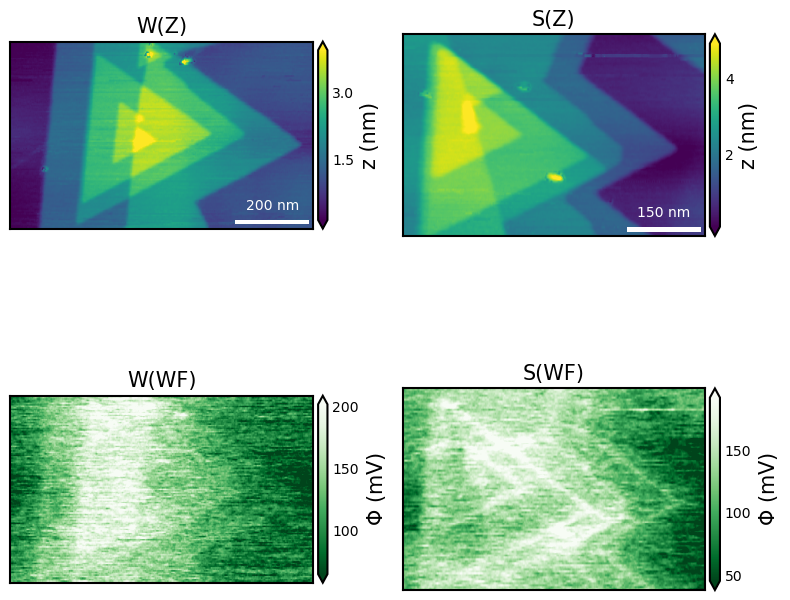

In [25]:
%matplotlib inline

fig,axes = plt.subplots(ncols=2,nrows =2, figsize  =(8,8))
axs = axes.ravel()
isns.imshow(W_0_xr.W_topo*1E9,
            robust = True, perc=(0.5,99.5),
            cmap = 'viridis',  
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)',
            ax = axs[0])
axs[0].set_title('W(Z)')
isns.imshow(W_0_xr.W_WF*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = '$\Phi$ (mV)',
            ax = axs[2])
axs[2].set_title('W(WF)')
isns.imshow(S_0_xr.S_topo*1E9,
            robust = True,perc=(0.5,99.5),
            cmap = 'viridis',
            dx=1, units="nm", 
            cbar_label = 'z (nm)', 
            ax = axs[1])
axs[1].set_title('S(Z)')
isns.imshow(S_0_xr.S_WF*1E3, 
            robust = True,
            cmap = 'Greens_r', 
            cbar_label = '$\Phi$ (mV)',
            ax = axs[3])
axs[3].set_title('S(WF)')

plt.tight_layout()
plt.savefig('W_S_Z_WF.svg')
plt.show()
#isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_topo.unstack(),robust = True, cmap = 'copper',  dx=1, units="nm")
#isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_WF.unstack(),robust = True, cmap = 'Blues' )

## Add CPD data channel 

In [38]:
W_zm_xr['W_CPD_zm']= -1*W_zm_xr.W_WF_zm
S_zm_xr['S_CPD_zm']= -1*S_zm_xr.S_WF_zm
# use the sige changes as an CPD  
# here, we ignored offset due tip work function to compare layer dependence

S_zm_xr
W_zm_xr

<xarray.Dataset>
Dimensions:    (Y: 150, X: 400)
Coordinates:
  * Y          (Y) float64 0.0 9.766e-10 1.953e-09 ... 1.445e-07 1.455e-07
  * X          (X) float64 0.0 9.766e-10 1.953e-09 ... 3.887e-07 3.896e-07
Data variables:
    W_topo_zm  (Y, X) float64 2.291e-09 2.291e-09 ... 4.254e-10 4.219e-10
    W_WF_zm    (Y, X) float64 0.1914 0.1925 0.1923 ... 0.08229 0.08216 0.08231
    W_CPD_zm   (Y, X) float64 -0.1914 -0.1925 -0.1923 ... -0.08216 -0.08231

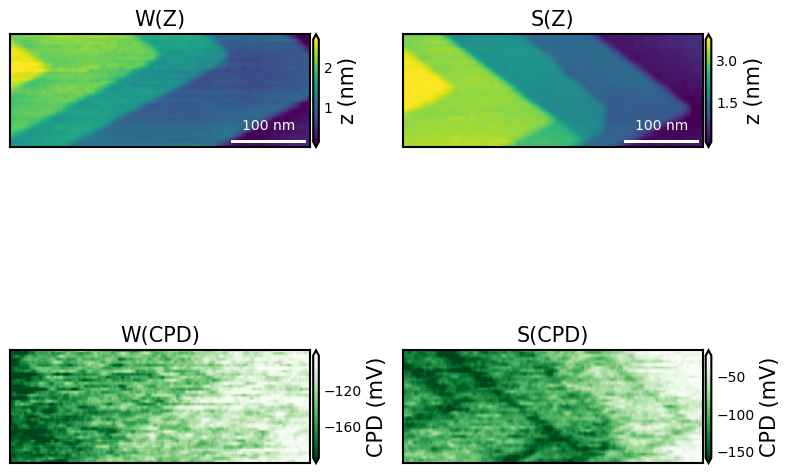

In [40]:
%matplotlib inline

fig,axes = plt.subplots(ncols=2,nrows =2, figsize  =(8,8))
axs = axes.ravel()
isns.imshow(W_zm_xr.W_topo_zm*1E9,
            robust = True, perc=(0.5,99.5),
            cmap = 'viridis',  
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)',
            ax = axs[0])
axs[0].set_title('W(Z)')
isns.imshow(W_zm_xr.W_CPD_zm*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = 'CPD (mV)',
            ax = axs[2])
axs[2].set_title('W(CPD)')
isns.imshow(S_zm_xr.S_topo_zm*1E9,
            robust = True,perc=(0.5,99.5),
            cmap = 'viridis',
            dx=1, units="nm", 
            cbar_label = 'z (nm)', 
            ax = axs[1])
axs[1].set_title('S(Z)')
isns.imshow(S_zm_xr.S_CPD_zm*1E3, 
            robust = True,
            cmap = 'Greens_r', 
            cbar_label = 'CPD (mV)',
            ax = axs[3])
axs[3].set_title('S(CPD)')

plt.tight_layout()
plt.savefig('W_S_Z_CPD.svg')
plt.show()



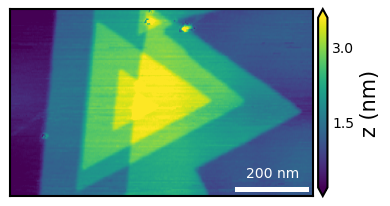

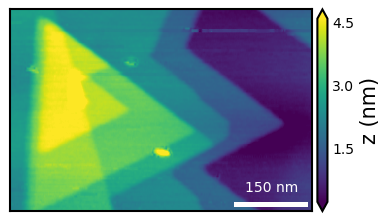

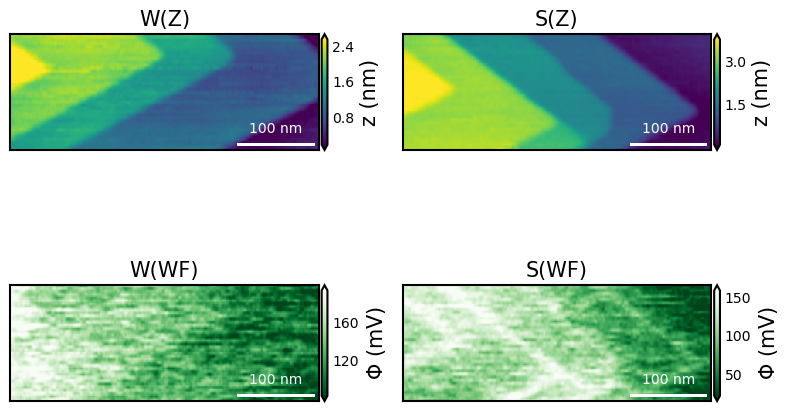

In [47]:

#### save W_z and S_z
fig,ax = plt.subplots(1,1, figsize  =(4,3))
isns.imshow(W_0_xr.W_topo*1E9,
            robust = True, 
            height = 4, 
            cmap = 'viridis', 
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)', 
            ax = ax)
plt.tight_layout()
plt.savefig('W_z.svg', dpi = 300)

fig,ax = plt.subplots(1,1, figsize  =(4,3))
isns.imshow(S_0_xr.S_topo*1E9,
            robust = True, 
            height = 4, 
            cmap = 'viridis', 
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)',
            ax = ax)
plt.tight_layout()
plt.savefig('S_z.svg', dpi = 300)

isns.set_context(mode="paper", fontfamily="sans-serif")

fig,axes = plt.subplots(2,2, figsize  =(8,6))
axs = axes.ravel()
isns.imshow(W_zm_xr.W_topo_zm*1E9,
            robust = True,
            aspect = 'equal', 
            cmap = 'viridis',  
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)',
            fontsize='xx-large',
            ax = axs[0])
axs[0].set_title('W(Z)')
isns.imshow(W_zm_xr.W_WF_zm*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = '$\Phi$ (mV)',
            dx=1, units="nm", 
            fontsize='xx-large',
            ax = axs[2])
axs[2].set_title('W(WF)')
isns.imshow(S_zm_xr.S_topo_zm*1E9,
            robust = True,
            aspect = 'equal', 
            cmap = 'viridis', 
            dx=1, units="nm", 
            cbar_label = 'z (nm)',
            fontsize='xx-large',
            ax = axs[1])
axs[1].set_title('S(Z)')
isns.imshow(S_zm_xr.S_WF_zm*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = '$\Phi$ (mV)', 
            dx=1, units="nm", 
            ax = axs[3])
axs[3].set_title('S(WF)')

plt.tight_layout()
plt.savefig('W_S_Z_WF_z.svg')
plt.show()



## Thresholding for Zoom-in 


### W_zm_xr
    * W_zm_xr $\to$ W_zm_topo_th  $\to$ assign terraces $\to$  W_zm_height_xr.height 
    * $\to$ W_zm_xr.height $\to$ W_zm_height_xr_sobel$\to$  height_sobel.rolling 
    * $\to$W_zm_xr.edge 

### Wedding-cake terraces

|HOPG | 1ML | 2ML | 3ML | 4ML |
| :- | -: | :-: | :-: | :-: |
|0   | 1 |   2|   3 |  4 |

In [52]:
W_zm_topo_th = threshold_multiotsu_xr(W_zm_xr, multiclasses=5)
#W_zm_topo_th.W_topo_zm.plot(cmap = 'copper')

W_zm_topo_th['height'] = W_zm_topo_th.W_topo_zm.copy()
W_zm_th_df = W_zm_topo_th.height.to_dataframe()
W_zm_height = W_zm_th_df.copy()
W_zm_height[W_zm_th_df ==0 ] = 0
W_zm_height[W_zm_th_df ==1 ] = 1
W_zm_height[W_zm_th_df ==2 ] = 2
W_zm_height[W_zm_th_df ==3 ] = 3
W_zm_height[W_zm_th_df ==4 ] = 4
W_zm_height[W_zm_th_df ==5 ] = 5
W_zm_height_xr = W_zm_height.to_xarray()

#W_zm_height_xr.height.plot()
#check the terrace 

W_topo_zm
W_WF_zm
W_CPD_zm


### edge finding with sobel 

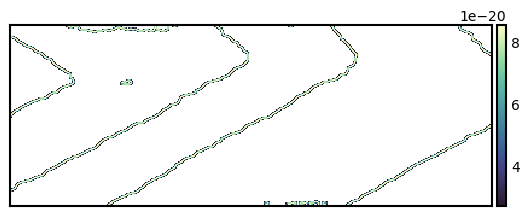

In [54]:
W_zm_xr = W_zm_xr.merge(W_zm_height_xr)
# W_zm_xr  has a height info now 

W_zm_height_xr_sobel =  threshold_mean_xr(filter_sobel_xr(W_zm_height_xr))
#W_xr_th_sobel.W_topo_gaussian_sobel)
#S_xr_th_sobel = FilterSobel_xr(S_xr_th)

#ThrshldMean_xr
isns.imshow(W_zm_height_xr_sobel.height_sobel)

W_zm_xr['edge']  = W_zm_height_xr_sobel.height_sobel.rolling(X = 5, Y= 5,  min_periods = 2 , center  = True).mean().notnull()
#W_zm_xr.edge.plot() # check 

#isns.imshow(W_zm_height_xr_sobel.height_sobel)
#W_zm_xr['edge'] 
#W_zm_xr

### check the boundary based on topography 

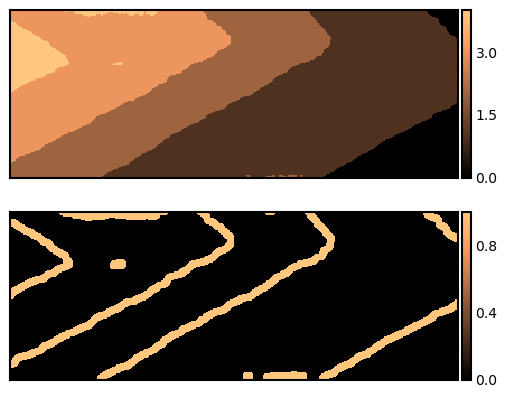

In [56]:
fig,axes =  plt.subplots(2,1)
axs = axes.ravel()
isns.imshow(W_zm_topo_th.W_topo_zm, ax =  axs[0], cmap = 'copper')
#isns.imshow(W_zm_height_xr_sobel.height_sobel, ax = axs[1], cmap = 'copper')
isns.imshow(W_zm_xr.edge, ax = axs[1], cmap = 'copper')
plt.show()
# choose the multiOtsu results to assigne the terrace 

    
### S_zm_xr

### Spiral terraces
|HOPG | 1ML | 2ML | 3ML | 4ML| 5ML |
| :- | -: | :-: | :-: | :-: |:-: |
|0   | 1 |   2|   3 |  4 |  5 |

In [59]:
## call saved file 
"""
S_zm_topo_th = threshold_multiotsu_xr(S_zm_xr, multiclasses=6)
"""


#S_zm_topo_th.S_topo_zm.plot()
#S_zm_topo_th.S_topo_zm.plot()

'\nS_zm_topo_th = threshold_multiotsu_xr(S_zm_xr, multiclasses=6)\n'

In [60]:
"""
S_zm_topo_th.to_netcdf("S_zm_topo_th.nc")

"""


# S_zm_topo_th take too long time to calcuate
# save it as nc format

'\nS_zm_topo_th.to_netcdf("S_zm_topo_th.nc")\n\n'

In [61]:
#
S_zm_topo_th = xr.open_dataset("S_zm_topo_th.nc")

In [62]:
# remove the defect manually

S_zm_topo_th['height'] = S_zm_topo_th.S_topo_zm.copy()
S_zm_th_df = S_zm_topo_th.height.to_dataframe()
S_zm_height = S_zm_th_df.copy()

S_zm_th_df['set_X_range'] = S_zm_th_df.index.get_level_values(level=1)>1E-7
# multi index 에서 x에 해당하는  value 범위지정. 

S_zm_height[S_zm_th_df.height ==0 ] = 0
S_zm_height[S_zm_th_df.height ==1 ] = 1
S_zm_height[S_zm_th_df.height ==2 ] = 2
S_zm_height[S_zm_th_df.height ==3 ] = 3
S_zm_height[S_zm_th_df.height ==4 ] = 4
S_zm_height[(S_zm_th_df.height == 5 ) & (S_zm_th_df.set_X_range == False ) ] = 5
S_zm_height[(S_zm_th_df.height == 5 ) & (S_zm_th_df.set_X_range == True ) ] = 6
S_zm_height_xr = S_zm_height.to_xarray()

#S_zm_height_xr.height.plot()
#check the terrace 

<xarray.Dataset>
Dimensions:    (Y: 150, X: 400)
Coordinates:
  * Y          (Y) float64 0.0 9.766e-10 1.953e-09 ... 1.445e-07 1.455e-07
  * X          (X) float64 0.0 9.766e-10 1.953e-09 ... 3.887e-07 3.896e-07
Data variables:
    S_topo_zm  (Y, X) float64 2.896e-09 2.883e-09 ... 3.582e-10 3.75e-10
    S_WF_zm    (Y, X) float64 0.1439 0.1437 0.1436 ... 0.02554 0.02514 0.02579
    S_CPD_zm   (Y, X) float64 -0.1439 -0.1437 -0.1436 ... -0.02514 -0.02579
    height     (Y, X) int64 4 4 4 3 3 4 4 4 4 4 4 4 ... 0 0 0 0 0 0 0 0 0 0 0 0
    edge       (Y, X) bool True True True True True ... False False False False

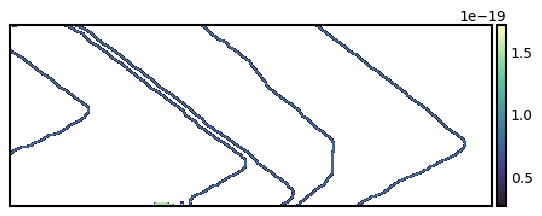

In [63]:
S_zm_xr = S_zm_xr.merge(S_zm_height_xr)
# S_zm_xr  has a height info now 

S_zm_height_xr_sobel =  threshold_mean_xr(filter_sobel_xr(S_zm_height_xr))

#ThrshldMean_xr
isns.imshow(S_zm_height_xr_sobel.height_sobel)


S_zm_xr['edge']  = S_zm_height_xr_sobel.height_sobel.rolling(X = 7, Y= 7,  min_periods = 2 , center  = True).mean().notnull()
#S_zm_xr.edge.plot()

S_zm_xr

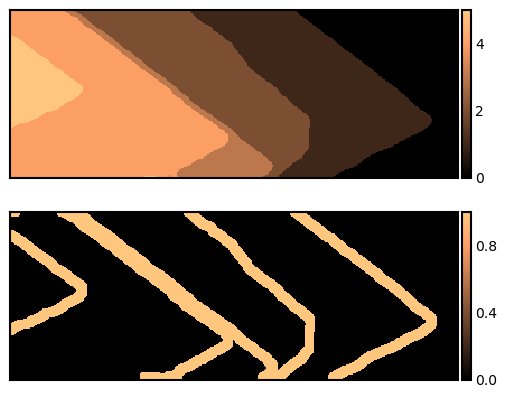

In [64]:
fig,axes =  plt.subplots(2,1)
axs = axes.ravel()
isns.imshow(S_zm_topo_th.S_topo_zm, ax =  axs[0], cmap = 'copper')
isns.imshow(S_zm_xr.edge, ax = axs[1], cmap = 'copper')
plt.show()
# choose the multiOtsu results to assigne the terrace 



In [73]:
#S_zm_xr
#W_zm_xr


W_xr_df = W_zm_xr.to_dataframe()
S_xr_df = S_zm_xr.to_dataframe()

# PANDAS masks for W
Wmask_0 = (~ W_xr_df.edge ) & (W_xr_df.height == 0) 
Wmask_1 = (~ W_xr_df.edge ) & (W_xr_df.height == 1)
Wmask_2 = (~ W_xr_df.edge ) & (W_xr_df.height == 2)
Wmask_3 = (~ W_xr_df.edge ) & (W_xr_df.height == 3)
Wmask_4 = (~ W_xr_df.edge ) & (W_xr_df.height == 4)

W_xr_df['layer'] = 'boundary'
W_xr_df.layer[Wmask_0] = 'HOPG'
W_xr_df.layer[Wmask_1] = '1ML'
W_xr_df.layer[Wmask_2] = '2ML'
W_xr_df.layer[Wmask_3] = '3ML'
W_xr_df.layer[Wmask_4] = '4ML'
W_xr_df.layer.astype(str)

# PANDAS masks for S
Smask_0 = ( ~S_xr_df.edge ) & (S_xr_df.height == 0) 
Smask_1 = ( ~S_xr_df.edge ) & (S_xr_df.height == 1)
Smask_2 = ( ~S_xr_df.edge ) & (S_xr_df.height == 2)
Smask_3 = ( ~S_xr_df.edge ) & (S_xr_df.height == 3)
Smask_4 = ( ~S_xr_df.edge ) & (S_xr_df.height == 4)
Smask_5 = ( ~S_xr_df.edge ) & (S_xr_df.height == 5)

S_xr_df['layer'] = 'boundary'
S_xr_df.layer[Smask_0] = 'HOPG'
S_xr_df.layer[Smask_1] = '1ML'
S_xr_df.layer[Smask_2] = '2ML'
S_xr_df.layer[Smask_3] = '3ML'
S_xr_df.layer[Smask_4] = '4ML'
S_xr_df.layer[Smask_5] = '5ML'
S_xr_df.layer.astype(str)

#####
# xarray 
W_df_xr = W_xr_df.to_xarray()
S_df_xr = S_xr_df.to_xarray()

C:\Users\gkp\AppData\Local\Temp\ipykernel_16792\1506933160.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_xr_df.layer[Wmask_0] = 'HOPG'
C:\Users\gkp\AppData\Local\Temp\ipykernel_16792\1506933160.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_xr_df.layer[Wmask_1] = '1ML'
C:\Users\gkp\AppData\Local\Temp\ipykernel_16792\1506933160.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_xr_df.layer[Wmask_2] = '2ML'
C:\Users\

In [75]:
W_zm_xr

<xarray.Dataset>
Dimensions:    (Y: 150, X: 400)
Coordinates:
  * Y          (Y) float64 0.0 9.766e-10 1.953e-09 ... 1.445e-07 1.455e-07
  * X          (X) float64 0.0 9.766e-10 1.953e-09 ... 3.887e-07 3.896e-07
Data variables:
    W_topo_zm  (Y, X) float64 2.291e-09 2.291e-09 ... 4.254e-10 4.219e-10
    W_WF_zm    (Y, X) float64 0.1914 0.1925 0.1923 ... 0.08229 0.08216 0.08231
    W_CPD_zm   (Y, X) float64 -0.1914 -0.1925 -0.1923 ... -0.08216 -0.08231
    height     (Y, X) int64 3 3 3 3 3 3 3 3 3 3 3 3 ... 0 0 0 0 0 0 0 0 0 0 0 0
    edge       (Y, X) bool False False False False ... False False False False
Attributes:
    threshold:  {'W_CPD_zm_threshold_multiotsu': array([ 81, 113, 144, 176])}

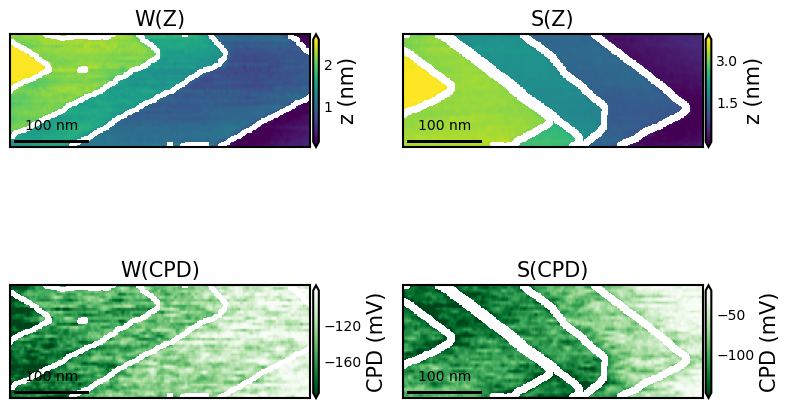

'\nisns.imshow(W_xr_df[W_xr_df.layer != \'boundary\'].W_topo_zm.unstack(),robust = True, cmap = \'copper\',  dx=1, units="nm")\nisns.imshow(W_xr_df[W_xr_df.layer != \'boundary\'].W_WF_zm.unstack(),robust = True, cmap = \'Blues\' )\n\n# hv plot is not working well. \n# use the isns instead, \nisns.imshow(S_xr_df[S_xr_df.layer != \'boundary\'].S_topo_zm.unstack(),robust = True, cmap = \'copper\' ,  dx=1, units="nm")\nisns.imshow(S_xr_df[S_xr_df.layer != \'boundary\'].S_WF_zm.unstack(),robust = True, cmap = \'Blues\')\n\n'

In [77]:
#W_df_xr
#S_df_xr

fig,axes = plt.subplots(2,2, figsize  =(8,6))
axs = axes.ravel()
isns.set_scalebar(color = "k", location='lower left')
isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_topo_zm.unstack()*1E9,
            robust = True,
            aspect = 'equal', 
            cmap = 'viridis',  
            dx=1, 
            units="nm", 
            cbar_label = 'z (nm)', 
            ax = axs[0])
axs[0].set_title('W(Z)')


isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_CPD_zm.unstack()*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = 'CPD (mV)', 
            dx=1, units="nm", 
            ax = axs[2])
axs[2].set_title('W(CPD)')
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_topo_zm.unstack()*1E9,
            robust = True,
            aspect = 'equal', 
            cmap = 'viridis', 
            dx=1, units="nm", 
            cbar_label = 'z (nm)',
            ax = axs[1])
axs[1].set_title('S(Z)')
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_CPD_zm.unstack()*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            cbar_label = 'CPD (mV)',
            dx=1, units="nm", 
            ax = axs[3])
axs[3].set_title('S(CPD)')

plt.tight_layout()
plt.savefig('W_S_Z_CPD_z_remove edge.svg')
plt.show()



'''
isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_topo_zm.unstack(),robust = True, cmap = 'copper',  dx=1, units="nm")
isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_WF_zm.unstack(),robust = True, cmap = 'Blues' )

# hv plot is not working well. 
# use the isns instead, 
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_topo_zm.unstack(),robust = True, cmap = 'copper' ,  dx=1, units="nm")
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_WF_zm.unstack(),robust = True, cmap = 'Blues')

'''

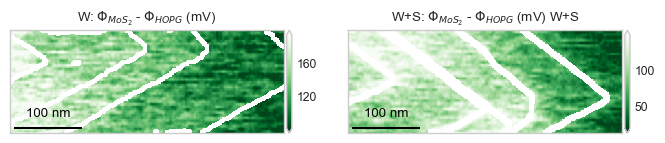

'\nisns.imshow(W_xr_df[W_xr_df.layer != \'boundary\'].W_topo_zm.unstack(),robust = True, cmap = \'copper\',  dx=1, units="nm")\nisns.imshow(W_xr_df[W_xr_df.layer != \'boundary\'].W_WF_zm.unstack(),robust = True, cmap = \'Blues\' )\n\n# hv plot is not working well. \n# use the isns instead, \nisns.imshow(S_xr_df[S_xr_df.layer != \'boundary\'].S_topo_zm.unstack(),robust = True, cmap = \'copper\' ,  dx=1, units="nm")\nisns.imshow(S_xr_df[S_xr_df.layer != \'boundary\'].S_WF_zm.unstack(),robust = True, cmap = \'Blues\')\n\n'

In [134]:
#W_df_xr
#S_df_xr

fig,axes = plt.subplots(1,2, figsize  =(8,6))
axs = axes.ravel()
isns.set_scalebar(color = "k", location='lower left')

isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_WF_zm.unstack()*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            #cbar_label = '$\Phi_{sample}$ (mV)', 
            dx=1, units="nm", 
            ax = axs[0])
axs[0].set_title('W: $\Phi_{MoS_{2}}$ - $\Phi_{HOPG}$ (mV)')
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_WF_zm.unstack()*1E3,
            robust = True, 
            cmap = 'Greens_r', 
            #cbar_label = '$\Phi_{sample}$ (mV)', 
            dx=1, units="nm", 
            ax = axs[1])
axs[1].set_title('W+S: $\Phi_{MoS_{2}}$ - $\Phi_{HOPG}$ (mV) W+S')

# plt.tight_layout()
plt.savefig('W_S_Z_CPD_z_remove edge.svg')
plt.show()



'''
isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_topo_zm.unstack(),robust = True, cmap = 'copper',  dx=1, units="nm")
isns.imshow(W_xr_df[W_xr_df.layer != 'boundary'].W_WF_zm.unstack(),robust = True, cmap = 'Blues' )

# hv plot is not working well. 
# use the isns instead, 
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_topo_zm.unstack(),robust = True, cmap = 'copper' ,  dx=1, units="nm")
isns.imshow(S_xr_df[S_xr_df.layer != 'boundary'].S_WF_zm.unstack(),robust = True, cmap = 'Blues')

'''

In [80]:
#W_df_xr
#S_df_xr

############
# extract statistics from W_df_xr & S_df_xr
############
W_layers_name = [ 'HOPG', '1ML', '2ML', '3ML','4ML','boundary']

W_layers_stats = W_df_xr.groupby('layer').mean().W_topo_zm.to_dataframe()
W_layers_stats['W_WF'] = W_df_xr.groupby('layer').mean().W_WF_zm.to_dataframe()
W_layers_stats['W_CPD'] = W_df_xr.groupby('layer').mean().W_CPD_zm.to_dataframe()
#W_layers_stats
# W_topo, W_WF mean & std 


S_layers_name = [ 'HOPG', '1ML', '2ML', '3ML','4ML','5ML','boundary']

S_layers_stats = S_df_xr.groupby('layer').mean().S_topo_zm.to_dataframe()
S_layers_stats['S_WF'] = S_df_xr.groupby('layer').mean().S_WF_zm.to_dataframe()
S_layers_stats['S_CPD'] = S_df_xr.groupby('layer').mean().S_CPD_zm.to_dataframe()
#S_layers_stats
# S_topo, S_WF mean & std 
############
S_layers_stats

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core

,S_topo_zm,S_WF,S_CPD
layer,,,
1ML,1.253e-09,7.923e-02,-7.923e-02
2ML,1.895e-09,1.167e-01,-1.167e-01
3ML,2.582e-09,1.286e-01,-1.286e-01
4ML,3.196e-09,1.149e-01,-1.149e-01
5ML,3.738e-09,1.230e-01,-1.230e-01
HOPG,2.783e-10,4.301e-02,-4.301e-02
boundary,2.037e-09,1.246e-01,-1.246e-01


In [81]:
W_layers_stats

,W_topo_zm,W_WF,W_CPD
layer,,,
1ML,9.015e-10,1.143e-01,-1.143e-01
2ML,1.528e-09,1.504e-01,-1.504e-01
3ML,2.130e-09,1.604e-01,-1.604e-01
4ML,2.636e-09,1.862e-01,-1.862e-01
HOPG,2.225e-10,9.551e-02,-9.551e-02
boundary,1.506e-09,1.435e-01,-1.435e-01


In [83]:
###################
# Confidential Interval calcuation based on scipy t-test
###################

###################
# W layers
###################
# topography 
W_layer_stats_topo = np.array([])

for layer_name in W_layers_name: 
    layer_mean =  W_df_xr.groupby('layer')[layer_name].W_topo_zm.mean().values
    layer_std =  W_df_xr.groupby('layer')[layer_name].W_topo_zm.std().values
    layer_CI95 = sp.stats.t.interval(0.95,
                                    W_df_xr.groupby('layer').count().sel(
                                        layer = layer_name
                                    ).W_topo_zm.values - 1,
                                    layer_mean,
                                    layer_std)
    W_layer_stats_topo = np.append (W_layer_stats_topo, 
                                    np.array([layer_mean, 
                                              layer_std,
                                              layer_CI95[0], 
                                              layer_CI95[1]]),
                                    axis = 0)
    
W_layer_stats_topo = W_layer_stats_topo.reshape(-1,4)
# layer_stats shape check 

W_layers_stats[['W_topo_mean',
                'W_topo_std',
                'W_topo_ci95_0',
                'W_topo_ci95_1']] = W_layer_stats_topo

###################
# Work Function results 
W_layer_stats_WF = np.array([])

for layer_name in W_layers_name: 
    layer_mean =  W_df_xr.groupby('layer')[layer_name].W_WF_zm.mean().values
    layer_std =  W_df_xr.groupby('layer')[layer_name].W_WF_zm.std().values
    layer_CI95 = sp.stats.t.interval(0.95,
                                    W_df_xr.groupby('layer').count().sel(
                                        layer = layer_name
                                    ).W_WF_zm.values - 1,
                                    layer_mean,
                                    layer_std)
    W_layer_stats_WF = np.append (W_layer_stats_WF,
                                  np.array([layer_mean, 
                                            layer_std, 
                                            layer_CI95[0], 
                                            layer_CI95[1]]), 
                                  axis = 0)
    
W_layer_stats_WF = W_layer_stats_WF.reshape(-1,4)
# layer_stats shape check 

W_layers_stats[['W_WF_mean',
                'W_WF_std',
                'W_WF_ci95_0',
                'W_WF_ci95_1']] = W_layer_stats_WF
#W_layers = W_layers.drop([ 'HOPG', 'boundary'])

W_layers_stats = W_layers_stats.drop(['W_topo_zm', 'W_WF'],
                                     axis =1)
# index sorting result  ==> drop inconsistent columns 
W_layers_stats

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core

,W_CPD,W_topo_mean,W_topo_std,W_topo_ci95_0,W_topo_ci95_1,W_WF_mean,W_WF_std,W_WF_ci95_0,W_WF_ci95_1
layer,,,,,,,,,
1ML,-1.143e-01,2.225e-10,8.225e-11,6.121e-11,3.837e-10,9.551e-02,1.376e-02,6.853e-02,1.225e-01
2ML,-1.504e-01,9.015e-10,1.113e-10,6.834e-10,1.120e-09,1.143e-01,1.773e-02,7.953e-02,1.490e-01
3ML,-1.604e-01,1.528e-09,8.966e-11,1.352e-09,1.704e-09,1.504e-01,1.957e-02,1.120e-01,1.887e-01
4ML,-1.862e-01,2.130e-09,7.420e-11,1.984e-09,2.275e-09,1.604e-01,1.744e-02,1.262e-01,1.946e-01
HOPG,-9.551e-02,2.636e-09,9.918e-11,2.442e-09,2.831e-09,1.862e-01,1.783e-02,1.512e-01,2.212e-01
boundary,-1.435e-01,1.506e-09,6.176e-10,2.956e-10,2.717e-09,1.435e-01,2.711e-02,9.040e-02,1.967e-01


In [85]:
###################
# Confidential Interval calcuation based on scipy t-test
###################

###################
# S layers
###################
# topography 
S_layer_stats_topo = np.array([])

for layer_name in S_layers_name: 
    layer_mean =  S_df_xr.groupby('layer')[layer_name].S_topo_zm.mean().values
    layer_std =  S_df_xr.groupby('layer')[layer_name].S_topo_zm.std().values
    layer_CI95 = sp.stats.t.interval(0.95,
                                    S_df_xr.groupby('layer').count().sel(
                                        layer = layer_name
                                    ).S_topo_zm.values - 1,
                                    layer_mean,
                                    layer_std)
    S_layer_stats_topo = np.append (S_layer_stats_topo, 
                                    np.array([layer_mean,
                                              layer_std, 
                                              layer_CI95[0], 
                                              layer_CI95[1]]), 
                                    axis = 0)
    
S_layer_stats_topo = S_layer_stats_topo.reshape(-1,4)
# layer_stats shape check 

S_layers_stats[['S_topo_mean',
                'S_topo_std',
                'S_topo_ci95_0',
                'S_topo_ci95_1']] = S_layer_stats_topo

###################
# Work Function results 
S_layer_stats_WF = np.array([])

for layer_name in S_layers_name: 
    layer_mean =  S_df_xr.groupby('layer')[layer_name].S_WF_zm.mean().values
    layer_std =  S_df_xr.groupby('layer')[layer_name].S_WF_zm.std().values
    layer_CI95 = sp.stats.t.interval(0.95,
                                    S_df_xr.groupby('layer').count().sel(
                                        layer = layer_name
                                    ).S_WF_zm.values - 1,
                                    layer_mean,
                                    layer_std)
    S_layer_stats_WF = np.append (S_layer_stats_WF, 
                                  np.array([layer_mean, 
                                            layer_std, 
                                            layer_CI95[0], 
                                            layer_CI95[1]]), 
                                  axis = 0)
    
S_layer_stats_WF = S_layer_stats_WF.reshape(-1,4)
# layer_stats shape check 
S_layer_stats_WF

S_layers_stats[['S_WF_mean','S_WF_std','S_WF_ci95_0','S_WF_ci95_1']] = S_layer_stats_WF
#W_layers = W_layers.drop([ 'HOPG', 'boundary'])

S_layers_stats = S_layers_stats.drop(['S_topo_zm', 'S_WF'], axis =1)
# index sorting result  ==> drop inconsistent columns 
S_layers_stats

C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core\numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
C:\Users\gkp\AppData\Local\anaconda3\lib\site-packages\numpy\core

,S_CPD,S_topo_mean,S_topo_std,S_topo_ci95_0,S_topo_ci95_1,S_WF_mean,S_WF_std,S_WF_ci95_0,S_WF_ci95_1
layer,,,,,,,,,
1ML,-7.923e-02,2.783e-10,1.272e-10,2.905e-11,5.276e-10,4.301e-02,1.830e-02,7.129e-03,7.888e-02
2ML,-1.167e-01,1.253e-09,8.692e-11,1.083e-09,1.424e-09,7.923e-02,1.913e-02,4.173e-02,1.167e-01
3ML,-1.286e-01,1.895e-09,7.679e-11,1.745e-09,2.046e-09,1.167e-01,1.391e-02,8.945e-02,1.440e-01
4ML,-1.149e-01,2.582e-09,5.640e-11,2.472e-09,2.693e-09,1.286e-01,1.201e-02,1.051e-01,1.522e-01
5ML,-1.230e-01,3.196e-09,6.938e-11,3.060e-09,3.332e-09,1.149e-01,1.866e-02,7.836e-02,1.515e-01
HOPG,-4.301e-02,3.738e-09,3.277e-11,3.673e-09,3.802e-09,1.230e-01,1.377e-02,9.597e-02,1.500e-01
boundary,-1.246e-01,2.037e-09,9.858e-10,1.043e-10,3.969e-09,1.246e-01,3.018e-02,6.541e-02,1.837e-01


In [88]:
W_layers_stats_1234 = W_layers_stats.drop([ 'HOPG', 'boundary'])#.reset_index()
S_layers_stats_12345 = S_layers_stats.drop([ 'HOPG', 'boundary'])#.reset_index()
W_layers_stats_1234_offset = W_layers_stats_1234.copy(deep=  True )
W_layers_stats_1234_offset.W_topo_mean = W_layers_stats_1234.W_topo_mean -  W_layers_stats_1234.loc['1ML'].W_topo_mean
W_layers_stats_1234_offset.W_topo_mean = W_layers_stats_1234.W_topo_mean -  W_layers_stats_1234.loc['1ML'].W_topo_mean

W_layers_stats_1234_offset

,W_CPD,W_topo_mean,W_topo_std,W_topo_ci95_0,W_topo_ci95_1,W_WF_mean,W_WF_std,W_WF_ci95_0,W_WF_ci95_1
layer,,,,,,,,,
1ML,-1.143e-01,0.000e+00,8.225e-11,6.121e-11,3.837e-10,9.551e-02,1.376e-02,6.853e-02,1.225e-01
2ML,-1.504e-01,6.790e-10,1.113e-10,6.834e-10,1.120e-09,1.143e-01,1.773e-02,7.953e-02,1.490e-01
3ML,-1.604e-01,1.305e-09,8.966e-11,1.352e-09,1.704e-09,1.504e-01,1.957e-02,1.120e-01,1.887e-01
4ML,-1.862e-01,1.907e-09,7.420e-11,1.984e-09,2.275e-09,1.604e-01,1.744e-02,1.262e-01,1.946e-01


In [89]:
W_xr_df

W_topo_zm   W_WF_zm   W_CPD_zm  height   edge layer
Y         X                                                             
0.000e+00 0.000e+00  2.291e-09 1.914e-01 -1.914e-01       3  False   3ML
          9.766e-10  2.291e-09 1.925e-01 -1.925e-01       3  False   3ML
          1.953e-09  2.294e-09 1.923e-01 -1.923e-01       3  False   3ML
          2.930e-09  2.300e-09 1.908e-01 -1.908e-01       3  False   3ML
          3.906e-09  2.296e-09 1.905e-01 -1.905e-01       3  False   3ML
...                        ...       ...        ...     ...    ...   ...
1.455e-07 3.857e-07  4.248e-10 8.300e-02 -8.300e-02       0  False  HOPG
          3.867e-07  4.294e-10 8.269e-02 -8.269e-02       0  False  HOPG
          3.877e-07  4.279e-10 8.229e-02 -8.229e-02       0  False  HOPG
          3.887e-07  4.254e-10 8.216e-02 -8.216e-02       0  False  HOPG
          3.896e-07  4.219e-10 8.231e-02 -8.231e-02       0  False  HOPG

[60000 rows x 6 columns]

In [91]:
#matplotlib box plox

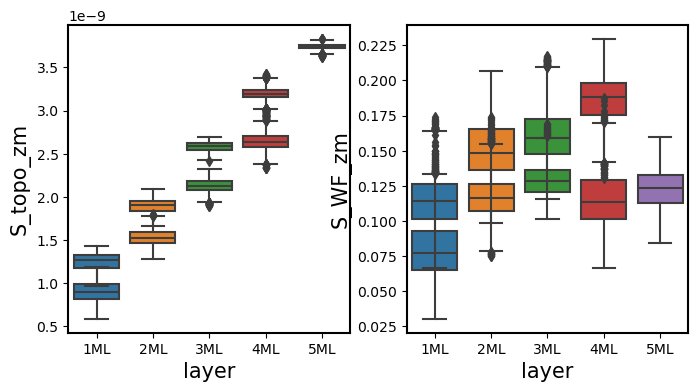

In [92]:
W_xr_df_01234 = W_xr_df[(W_xr_df.layer != 'boundary') & (W_xr_df.layer != 'HOPG')]
S_xr_df_012345 = S_xr_df[(S_xr_df.layer != 'boundary') & (S_xr_df.layer != 'HOPG')]

fig, axes = plt.subplots(1,2, figsize = (8,4))
axs = axes.ravel()
sns.boxplot(data =  W_xr_df_01234,
            x = 'layer', 
            y = 'W_topo_zm',
            ax = axs[0], 
            order = ['1ML','2ML','3ML','4ML'])
sns.boxplot(data =  W_xr_df_01234,
            x = 'layer', 
            y = 'W_WF_zm',
            ax = axs[1],
            order = [ '1ML','2ML','3ML','4ML'])
sns.boxplot(data =  S_xr_df_012345,
            x = 'layer', 
            y = 'S_topo_zm', 
            ax = axs[0], 
            order = [ '1ML','2ML','3ML','4ML','5ML'])
sns.boxplot(data =  S_xr_df_012345, 
            x = 'layer', 
            y = 'S_WF_zm', 
            ax = axs[1], 
            order = [ '1ML','2ML','3ML','4ML','5ML'])

plt.show()

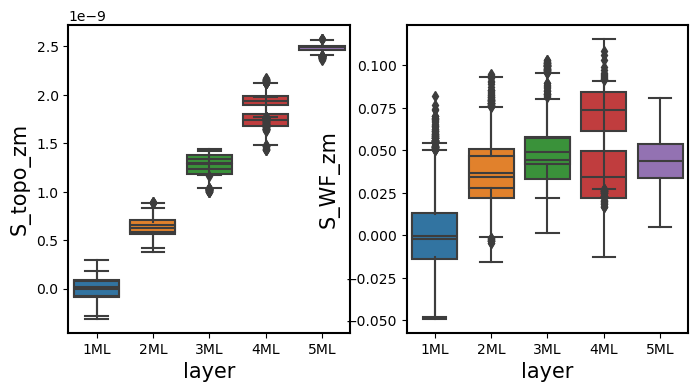

In [93]:
W_xr_df_01234_offset = W_xr_df_01234.copy(deep = True)
W_xr_df_01234_offset.W_topo_zm = W_xr_df_01234.W_topo_zm -  W_xr_df_01234.groupby('layer').mean().W_topo_zm.loc['1ML']
W_xr_df_01234_offset.W_WF_zm = W_xr_df_01234.W_WF_zm -  W_xr_df_01234.groupby('layer').mean().W_WF_zm.loc['1ML']


S_xr_df_012345_offset = S_xr_df_012345.copy(deep = True)
S_xr_df_012345_offset.S_topo_zm = S_xr_df_012345.S_topo_zm -  S_xr_df_012345.groupby('layer').mean().S_topo_zm.loc['1ML']
S_xr_df_012345_offset.S_WF_zm = S_xr_df_012345.S_WF_zm -  S_xr_df_012345.groupby('layer').mean().S_WF_zm.loc['1ML']


fig, axes = plt.subplots(1,2, figsize = (8,4))
axs = axes.ravel()
sns.boxplot(data =  W_xr_df_01234_offset, x = 'layer', y = 'W_topo_zm', ax = axs[0], order = ['1ML','2ML','3ML','4ML'])
sns.boxplot(data =  W_xr_df_01234_offset, x = 'layer', y = 'W_WF_zm', ax = axs[1], order = [ '1ML','2ML','3ML','4ML'])
sns.boxplot(data =  S_xr_df_012345_offset, x = 'layer', y = 'S_topo_zm', ax = axs[0], order = [ '1ML','2ML','3ML','4ML','5ML'])
sns.boxplot(data =  S_xr_df_012345_offset, x = 'layer', y = 'S_WF_zm', ax = axs[1], order = ['1ML','2ML','3ML','4ML','5ML'])


plt.show()

In [94]:
# delete above figures & make it  simple format

In [95]:
#W_S_df = pd.merge(W_xr_df_01234_offset,S_xr_df_012345_offset)
# it takes too long time 
#W_S_df

In [96]:
W_xr_df_01234_offset['stacking'] = 'W'
S_xr_df_012345_offset['stacking'] = 'S'
W_S_df = pd.merge(W_xr_df_01234_offset,S_xr_df_012345_offset)

In [97]:
W_xr_df_01234_offset.drop (['height','edge' ], axis =1)

W_topo_zm    W_WF_zm   W_CPD_zm layer stacking
Y         X                                                        
0.000e+00 0.000e+00  1.390e-09  7.715e-02 -1.914e-01   3ML        W
          9.766e-10  1.389e-09  7.821e-02 -1.925e-01   3ML        W
          1.953e-09  1.392e-09  7.799e-02 -1.923e-01   3ML        W
          2.930e-09  1.398e-09  7.649e-02 -1.908e-01   3ML        W
          3.906e-09  1.395e-09  7.620e-02 -1.905e-01   3ML        W
...                        ...        ...        ...   ...      ...
1.455e-07 2.646e-07 -1.411e-11  1.294e-03 -1.156e-01   1ML        W
          2.656e-07 -5.067e-11 -1.449e-03 -1.128e-01   1ML        W
          2.666e-07 -9.754e-11 -4.652e-03 -1.096e-01   1ML        W
          2.676e-07 -1.437e-10 -7.634e-03 -1.066e-01   1ML        W
          2.686e-07 -1.892e-10 -1.039e-02 -1.039e-01   1ML        W

[48887 rows x 5 columns]

In [99]:
W_S_df = pd.merge(W_xr_df_01234_offset.drop (['height','edge' ], axis =1),
                  S_xr_df_012345_offset.drop (['height','edge' ], axis =1), how = 'outer')



In [103]:
# topo & WF in 1 column 
W_S_df['topo'] = W_S_df.W_topo_zm
W_S_df.topo[W_S_df.topo.isnull()] = W_S_df.S_topo_zm

W_S_df['WF'] = W_S_df.W_WF_zm
W_S_df.WF[W_S_df.WF.isnull()] = W_S_df.S_WF_zm

C:\Users\gkp\AppData\Local\Temp\ipykernel_16792\1297721998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_S_df.topo[W_S_df.topo.isnull()] = W_S_df.S_topo_zm
C:\Users\gkp\AppData\Local\Temp\ipykernel_16792\1297721998.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W_S_df.WF[W_S_df.WF.isnull()] = W_S_df.S_WF_zm


<Axes: xlabel='layer', ylabel='topo'>

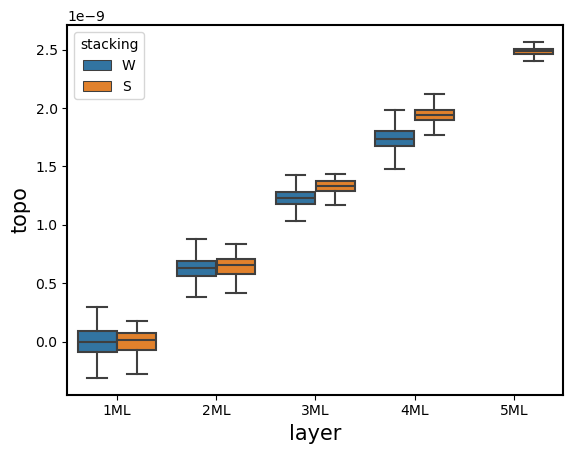

In [105]:
sns.boxplot(data =  W_S_df, x = 'layer', y = 'topo', hue = 'stacking',order = [ '1ML','2ML','3ML','4ML','5ML'],showfliers = False)

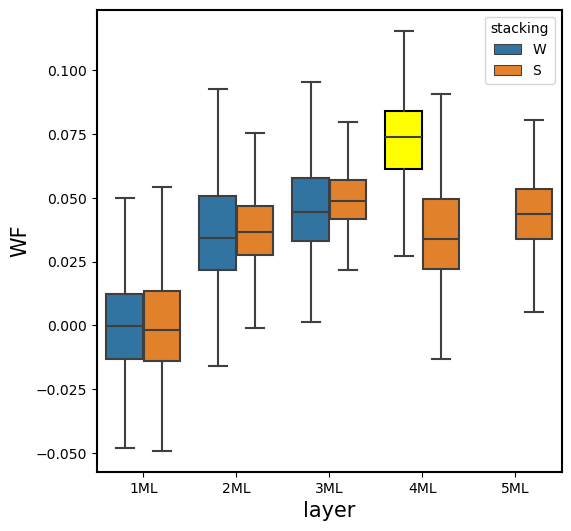

In [106]:
fig,ax  = plt.subplots(figsize=(6, 6))

ax =sns.boxplot(data =  W_S_df, x = 'layer', y = 'WF', hue = 'stacking',order = [ '1ML','2ML','3ML','4ML','5ML'],showfliers = False)

boxs = ax.patches
boxs[-3].set_facecolor("yellow")
boxs[-3].set_edgecolor("k")

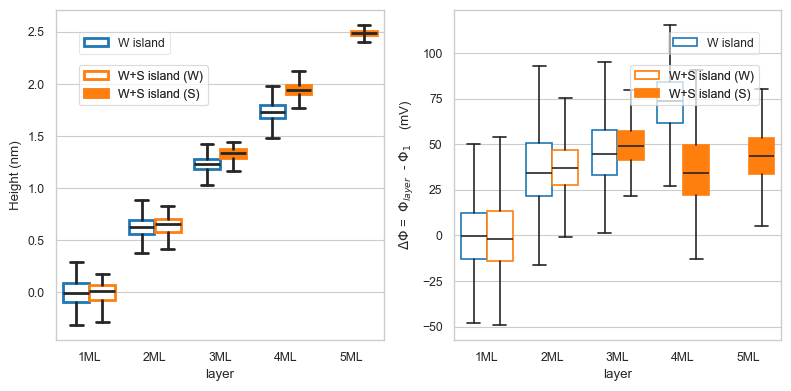

In [112]:
W_S_df['topo_nm'] = W_S_df.topo* 1E9
W_S_df['WF_mV'] = W_S_df.WF* 1E3


#sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.set_context("paper")


fig, axes = plt.subplots(1,2, figsize = (8,4))
axs = axes.ravel()

sns.boxplot(data =  W_S_df,
            x = 'layer',
            y = 'topo_nm', 
            hue = 'stacking',
            order = [ '1ML','2ML','3ML','4ML','5ML'],
            showfliers = False,#True,
            linewidth=2,
            #whis = 2.5,
            #notch=True,
            ax = axs[0],
            color='g')
#axs[0].set_xticklabels(axs[0].get_xmajorticklabels(), fontsize = 'large')
#axs[0].set_yticklabels(axs[0].get_ymajorticklabels(), fontsize = 'large')

boxs_z = axs[0].patches

for bar_i in range(len(boxs_z)):
    if bar_i in [1,4,6,8]: # 짝수  in W_patch_N:  # W 
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [3,5] :
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [7,9,10]:
        boxs_z[bar_i].set_facecolor("tab:orange")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [0]:
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [11]:
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)       


sns.boxplot(data =  W_S_df,
            x = 'layer', 
            y = 'WF_mV',
            hue = 'stacking',
            order = [ '1ML','2ML','3ML','4ML','5ML'],
            showfliers = False,#True,
            #whis = 2.5,
            #notch=True,
            ax = axs[1],
            color='g')#,palette=my_palette)


boxs_wf = axs[1].patches

for bar_i in range(len(boxs_wf)):
    if bar_i in [1,4,6,8]: # 짝수  in W_patch_N:  # W 
        boxs_wf[bar_i].set_facecolor("white")
        boxs_wf[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [3,5] :
        boxs_wf[bar_i].set_facecolor("white")
        boxs_wf[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [7,9,10] : 
        boxs_wf[bar_i].set_facecolor("tab:orange")
        boxs_wf[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)




#axs[1].set_xticklabels(axs[1].get_xmajorticklabels(), fontsize = 'large')
#axs[1].set_yticklabels(axs[1].get_ymajorticklabels(), fontsize = 'large')

#axs[1].patches[10].set_facecolor("darkred")
#axs[0].patches[1].set_facecolor("white")
#axs[0].patches[1].set_edgecolor("green")

#handles0, labels0 = axs[0].get_legend_handles_labels()    
#handles1, labels1  = axs[1].get_legend_handles_labels() 


legend_a0 = axs[0].legend(handles=[boxs_z[1]], labels = ['W island'],
                         loc='upper left',
                         bbox_to_anchor=(0.05, 0.95),
                         framealpha = 0.5)
legend_a1 = axs[0].legend(handles=[boxs_z[3],boxs_z[7]], labels = ['W+S island (W)','W+S island (S)'],
                         loc='upper left',
                         bbox_to_anchor=(0.05, 0.85),framealpha = 0.5)
legend_b0 = axs[1].legend(handles=[boxs_wf[1]], labels = ['W island'],
                         loc='upper right',
                         bbox_to_anchor=(0.95, 0.95),framealpha = 0.5)
legend_b1 = axs[1].legend(handles=[boxs_wf[3],boxs_wf[7]],
                         labels = ['W+S island (W)','W+S island (S)'],
                         loc='upper right',
                         bbox_to_anchor=(0.95, 0.85),framealpha = 0.5)

axs[0].add_artist(legend_a0)
axs[0].add_artist(legend_a1)
axs[1].add_artist(legend_b0)
axs[1].add_artist(legend_b1)   

###
# Associate manually the artists to a label.
axs[0].set_ylabel('Height (nm)')
axs[1].set_ylabel(r"$\Delta \Phi$ =  $\Phi_{layer}$  - $\Phi_{1}$    (mV)")

plt.tight_layout()
plt.savefig('W_S_Z_WF_boxplot.svg')
plt.show()

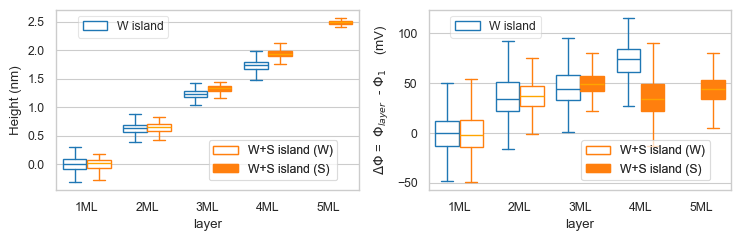

In [114]:
W_S_df['topo_nm'] = W_S_df.topo* 1E9
W_S_df['WF_mV'] = W_S_df.WF* 1E3


#sns.set_style("darkgrid")
sns.set_style("whitegrid")
sns.set_context("paper")


fig, axes = plt.subplots(1,2, figsize = (7.5,2.5))
axs = axes.ravel()

sns.boxplot(data =  W_S_df,
            x = 'layer',
            y = 'topo_nm', 
            hue = 'stacking',
            order = [ '1ML','2ML','3ML','4ML','5ML'],
            showfliers = False,#True,
            linewidth = 1,
            #whis = 2.5,
            #notch=True,
            ax = axs[0],
            color='g')
#axs[0].set_xticklabels(axs[0].get_xmajorticklabels(), fontsize = 'large')
#axs[0].set_yticklabels(axs[0].get_ymajorticklabels(), fontsize = 'large')


# change errorbar colors 
for line_i, line in enumerate (axs[0].get_lines()):
    #print( line_i)
    if line_i%10 in [0,1,2,3,4]:
        # 5 lines per points, 
        line.set_color('tab:blue')
        if line_i>= 40 :
            line.set_color('tab:orange')  
    else :
        line.set_color('tab:orange')  
    
for line_i, line in enumerate (axs[0].get_lines()):
    if line_i in [9,19,29,39,44]:
        line.set_color('orange') 
    # seperate assign for mean value line 
        
        
boxs_z = axs[0].patches

for bar_i in range(len(boxs_z)):
    if bar_i in [1,4,6,8]: # 짝수  in W_patch_N:  # W 
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [3,5] :
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [7,9,10]:
        boxs_z[bar_i].set_facecolor("tab:orange")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [0]:
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [11]:
        boxs_z[bar_i].set_facecolor("white")
        boxs_z[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)       


sns.boxplot(data =  W_S_df,
            x = 'layer', 
            y = 'WF_mV',
            hue = 'stacking',
            order = [ '1ML','2ML','3ML','4ML','5ML'],
            showfliers = False,#True,
            linewidth = 1,
            #whis = 2.5,
            #notch=True,
            ax = axs[1],
            color='g')#,palette=my_palette)


# change errorbar colors 
for line_i, line in enumerate (axs[1].get_lines()):
    #print( line_i)
    if line_i%10 in [0,1,2,3,4]:
        # 5 lines per points, 
        line.set_color('tab:blue')
        if line_i>= 40 :
            line.set_color('tab:orange')  
    else :
        line.set_color('tab:orange')  
    
for line_i, line in enumerate (axs[1].get_lines()):
    if line_i in [9,19,29,39,44]:
        line.set_color('orange') 
    # seperate assign for mean value line 

    
    
boxs_wf = axs[1].patches

for bar_i in range(len(boxs_wf)):
    if bar_i in [1,4,6,8]: # 짝수  in W_patch_N:  # W 
        boxs_wf[bar_i].set_facecolor("white")
        boxs_wf[bar_i].set_edgecolor("tab:blue")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [3,5] :
        boxs_wf[bar_i].set_facecolor("white")
        boxs_wf[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)
    elif bar_i in [7,9,10] : 
        boxs_wf[bar_i].set_facecolor("tab:orange")
        boxs_wf[bar_i].set_edgecolor("tab:orange")
        #barsA[bar_i].set_linewidth(1)




#axs[1].set_xticklabels(axs[1].get_xmajorticklabels(), fontsize = 'large')
#axs[1].set_yticklabels(axs[1].get_ymajorticklabels(), fontsize = 'large')

#axs[1].patches[10].set_facecolor("darkred")
#axs[0].patches[1].set_facecolor("white")
#axs[0].patches[1].set_edgecolor("green")

#handles0, labels0 = axs[0].get_legend_handles_labels()    
#handles1, labels1  = axs[1].get_legend_handles_labels() 


legend_a0 = axs[0].legend(handles=[boxs_z[1]], labels = ['W island'],
                         loc='upper left',
                         bbox_to_anchor=(0.05, 1),
                         framealpha = 0.5)
legend_a1 = axs[0].legend(handles=[boxs_z[3],boxs_z[7]], labels = ['W+S island (W)','W+S island (S)'],
                         loc='lower right',
                         bbox_to_anchor=(0.95, 0.02),framealpha = 0.5)
legend_b0 = axs[1].legend(handles=[boxs_wf[1]], labels = ['W island'],
                         loc='upper left',
                         bbox_to_anchor=(0.05, 1),framealpha = 0.5)
legend_b1 = axs[1].legend(handles=[boxs_wf[3],boxs_wf[7]],
                         labels = ['W+S island (W)','W+S island (S)'],
                         loc='lower right',
                         bbox_to_anchor=(0.95, 0.02),framealpha = 0.5)

axs[0].add_artist(legend_a0)
axs[0].add_artist(legend_a1)
axs[1].add_artist(legend_b0)
axs[1].add_artist(legend_b1)   

###
# Associate manually the artists to a label.
axs[0].set_ylabel('Height (nm)')
axs[1].set_ylabel(r"$\Delta \Phi$ =  $\Phi_{layer}$  - $\Phi_{1}$    (mV)")

plt.tight_layout()
plt.savefig('W_S_Z_WF_boxplot.svg')
plt.show()

<Axes: xlabel='layer', ylabel='topo_nm'>

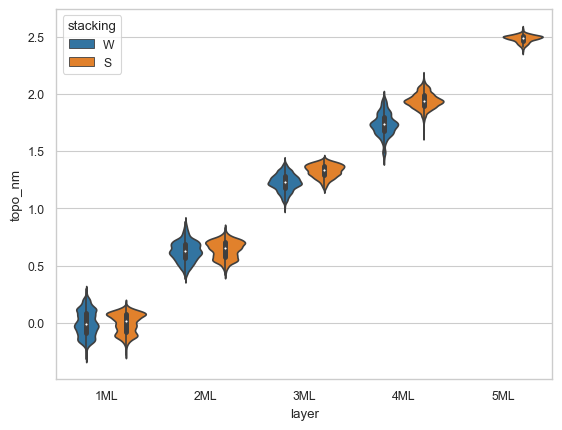

In [115]:
sns.violinplot(data =  W_S_df,
            x = 'layer', 
            y = 'topo_nm',
            hue = 'stacking',
            order = [ '1ML','2ML','3ML','4ML','5ML'],split=False, capsize=.01,  ci=95, errwidth=2)